**Imports and visualization**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

Reading the training data:

In [3]:
train = pd.read_csv('data/raw/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking if the df has missing data.

Table of the missing data:

In [4]:
null_values = pd.DataFrame(pd.isnull(train).any())
null_values['Sum'] = pd.isnull(train).sum()
null_values

,0,Sum
PassengerId,False,0
Survived,False,0
Pclass,False,0
Name,False,0
Sex,False,0
Age,True,177
SibSp,False,0
Parch,False,0
Ticket,False,0
Fare,False,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Cleaning the Data

The missing values are going to be filled with a Linear Regression

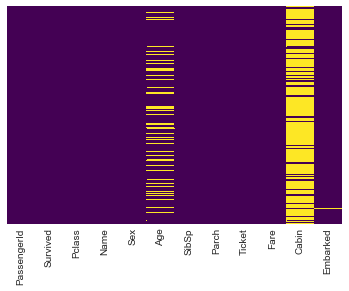

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.drop('Cabin',axis=1,inplace=True)

Creating dummy variables for sex and embarked columns:

In [8]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Passclass = pd.get_dummies(train['Pclass'],drop_first=True)
train = pd.concat([train,sex,embarked,Passclass],axis=1)


In [9]:
from sklearn.linear_model import LinearRegression

### Populate missing ages  using LinearRegression
def setMissingAges(df):
    
    # Grab all numerical features that can be included in a Linear Regression
    age_df = df[['Age','Q', 'S','Fare', 'Parch', 'SibSp']]
    
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]
    
    # All age values are stored in a target array
    y = knownAge.values[:, 0]
    
    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]
    
    # Create and fit a model
    lm = LinearRegression()
    lm.fit(X,y)
    
    # Use the fitted model to predict the missing values
    predictedAges = lm.predict(unknownAge.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

setMissingAges(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,31.781748,0,0,330877,8.4583,Q,1,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0,0,0,1,0


In [10]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

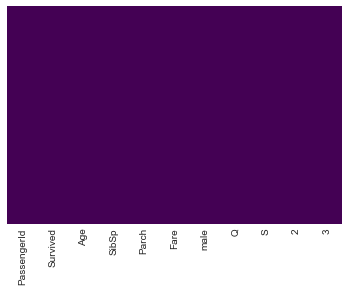

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now cleaning the test data:

In [12]:
test = pd.read_csv('data/raw/titanic_test.csv')
test.drop('Cabin',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [13]:
def impute_fare(cols):
    """ (list of intergers)->NoneType
    
    Change the age of the passengers if it is not in the data
    with the average age of the passengers of the same Pclass.
    """
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1:
            return 70
        elif Pclass == 2:
            return 50
        else:
            return 8
    else:
        return Fare

In [14]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)
sextest = pd.get_dummies(test['Sex'],drop_first=True)
embarkedtest = pd.get_dummies(test['Embarked'],drop_first=True)
Passclasstest = pd.get_dummies(test['Pclass'],drop_first=True)
test = pd.concat([test,sextest,embarkedtest,Passclasstest],axis=1)
test.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


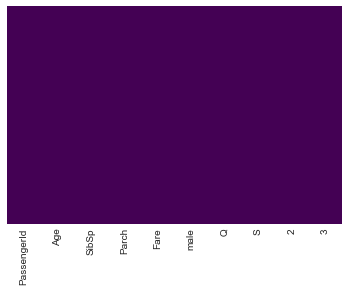

In [15]:
setMissingAges(test)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Train

In [16]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
X_test = test
predictions = logmodel.predict(X_test)


In [18]:
logmodel.coef_

array([[  2.26563700e-04,  -2.97199782e-02,  -3.32997439e-01,
         -8.10519663e-02,   5.01086139e-03,  -2.46307817e+00,
          6.26636737e-02,  -3.28107031e-01,  -5.47521845e-01,
         -1.66512592e+00]])

In [19]:
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


Creating the "Passenger Submission.csv" file with the format needed for kaggle competition.

In [20]:
df = pd.DataFrame(test['PassengerId'])
df['Survived']=predictions
df.to_csv("data/results/Passenger Submission-LM and LOG.csv", encoding='utf-8', index=False)